In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_rows', None)

In [5]:
transaction_all = pd.read_csv('../../데이터/transaction/transaction_all.csv')

transaction_all['계약연도'] = transaction_all['계약년월'].apply(lambda x: str(x)[:4])
transaction_all['거래금액(만원)'] = transaction_all['거래금액(만원)'].apply(lambda x: int(x.replace(',','')))
transaction_all['제곱미터당 거래금액(만원)'] = transaction_all['거래금액(만원)'] / transaction_all['전용면적(㎡)']

In [2]:
economy_all = pd.read_excel('../../데이터/Economy/economy_all.xlsx')

date_range = pd.date_range(start="2006-01", periods=len(economy_all), freq="M")
economy_all["계약년월"] = date_range.strftime('%Y%m').astype(int)

### 이상치 제거

### 논문 예시

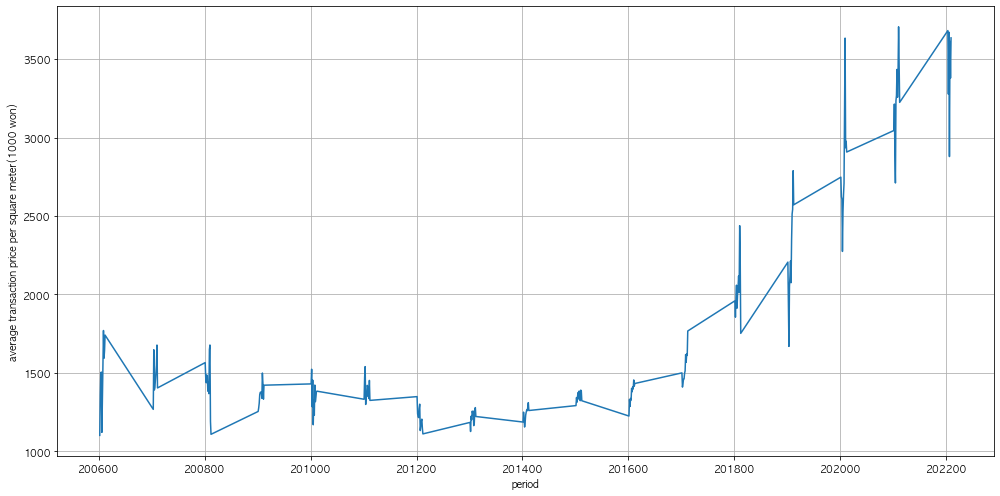

In [48]:
# 원본 데이터
rexel = transaction_all[transaction_all['단지명']=='도곡렉슬']
rexel_monthly_avg_price = rexel.groupby('계약년월')['제곱미터당 거래금액(만원)'].mean()

plt.figure(figsize=(14, 7))
rexel_monthly_avg_price.plot()
# plt.title('도곡렉슬 - 월별 제곱미터당 평균 거래금액 (2009-2022)')
plt.xlabel('period')
plt.ylabel('average transaction price per square meter(1000 won)')
plt.grid(True)
plt.tight_layout()

# file_path = "/mnt/data/banpo_jai_price_plot.png"
# plt.savefig(file_path)

plt.show()

In [49]:
# 다중대치 보간 데이터
from fancyimpute import IterativeImputer

rexel = transaction_all[transaction_all['단지명']=='도곡렉슬']
rexel_monthly_avg_price = rexel.groupby('계약년월')['제곱미터당 거래금액(만원)'].mean()

mice_imputer = IterativeImputer()
imputed_rexel = mice_imputer.fit_transform(rexel_monthly_avg_price)
imputed_rexel_monthly_avg_price = pd.DataFrame(imputed_rexel, columns=rexel_monthly_avg_price.columns)

plt.figure(figsize=(14, 7))
rexel_monthly_avg_price.plot()
# plt.title('도곡렉슬 - 월별 제곱미터당 평균 거래금액 (2009-2022)')
plt.xlabel('period')
plt.ylabel('average transaction price per square meter(1000 won)')
plt.grid(True)
plt.tight_layout()

# file_path = "/mnt/data/banpo_jai_price_plot.png"
# plt.savefig(file_path)

plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[1101.17725081 1358.89144914 1501.27363893 1504.57519777 1120.48203538
 1565.0689757  1769.79161954 1593.16605925 1640.2523016  1740.55783131
 1267.05100547 1647.08982757 1390.53112464 1405.31885045 1547.48619611
 1677.23237047 1403.70364221 1565.19114159 1471.17861812 1436.61497794
 1485.89563319 1482.00250528 1383.01594896 1438.79419057 1367.10805563
 1647.70238211 1677.49839588 1190.21848254 1107.9513103  1253.67139188
 1275.74718206 1306.05746405 1361.36754714 1375.70825695 1377.26365007
 1376.62499989 1337.90506388 1498.66157769 1432.49848758 1332.02963325
 1421.15070721 1429.37383771 1523.13854081 1283.57022634 1453.46377676
 1168.76042009 1328.13979866 1230.29896141 1422.0855922  1315.78070571
 1343.10935768 1380.42214203 1383.07628111 1331.46443917 1470.24658324
 1539.56753072 1298.35597554 1374.87523504 1348.21687025 1420.04334414
 1410.12776257 1361.37404734 1335.68356925 1451.68170839 1324.22445513
 1348.29439291 1238.9612874  1219.11409484 1214.61358725 1273.71449194
 1300.20946202 1131.89903483 1164.22444557 1192.15530956 1204.68910986
 1146.72969534 1110.59044904 1183.86219481 1125.85609125 1223.41835536
 1200.92678619 1255.05194087 1245.40098962 1255.91650441 1163.23519757
 1178.7167556  1264.77467804 1278.24622346 1221.54109202 1186.14215215
 1249.29577609 1203.59799503 1154.30830816 1184.33701099 1229.61377435
 1248.85532472 1262.76165515 1258.95416326 1280.82936194 1309.90990945
 1259.72782902 1291.07418928 1342.28573468 1312.9962019  1351.5987574
 1374.20973875 1333.39193343 1384.00403584 1368.18282422 1322.16733409
 1389.49987294 1385.34090387 1321.97475933 1224.48719247 1330.37377072
 1285.57284259 1336.52040284 1325.73892363 1400.72578459 1379.38030899
 1410.53063674 1397.34027358 1454.65964236 1414.90824141 1431.94621632
 1499.63256026 1409.05670933 1436.31038781 1459.68796626 1461.17474753
 1497.34814576 1512.21739755 1616.3612902  1567.51053871 1620.76255803
 1610.95595783 1766.76974216 1959.13674529 1854.98112335 1983.13122304
 2058.86228447 1912.49519096 2000.03764777 2046.8647538  2117.1361966
 2013.9834647  2438.3499431  2234.9167037  1751.59687248 2205.92387621
 1668.68505894 2052.6810007  2115.61095458 2212.80086117 2074.69090953
 2347.48861107 2512.39249476 2542.47477685 2789.056851   2571.5055661
 2747.71079677 2623.12552552 2608.38593867 2274.09400101 2525.97812946
 2634.98641396 2708.36711385 3135.36049759 3634.43577885 2935.24284857
 2976.76167694 2907.93597169 3045.13699824 3214.00195502 2899.61701648
 2710.8046836  3235.01718689 3267.99026164 3434.72289786 3256.99940075
 3418.16016329 3706.3527259  3224.55584523 3682.42225736 3276.97686454
 3672.16582701 2878.9979703  3613.39224431 3379.55174863 3635.93175098].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 단지별 거래량(window size 이상일 경우 유지)

In [ ]:
transaction_all['시군구 단지명'] = transaction_all['시군구'] + ' ' + transaction_all['단지명']

transaction_all_apartment_complex_volume = transaction_all.groupby('시군구 단지명').agg({'건축년도':'first','거래금액(만원)':'count'}).reset_index()
transaction_all_apartment_complex_volume = transaction_all_apartment_complex_volume.rename(columns={'거래금액(만원)':'거래량'})

transaction_all_apartment_complex_volume

### 평수별 신뢰구간(X)

In [ ]:
min_area = int(transaction_all["평수"].min())
max_area = int(transaction_all["평수"].max())

def confidence_interval(data):
    mean = np.mean(data)
    stderr = stats.sem(data)
    interval = stderr * stats.t.ppf((1 + 0.99) / 2., len(data) - 1)
    return (mean - interval, mean, mean + interval)

intervals = []
for area in range(min_area, max_area-80):
    subset = transaction_all[transaction_all["평수"] == area]["평단가"]
    if len(subset) > 1:  
        intervals.append((area, *confidence_interval(subset)))

df_intervals = pd.DataFrame(intervals, columns=["평수", "하단", "평균", "상단"])

plt.figure(figsize=(15, 8))
plt.fill_between(df_intervals["평수"], df_intervals["하단"], df_intervals["상단"], color='royalblue', label="95% 신뢰구간")
plt.plot(df_intervals["평수"], df_intervals["평균"], label="평균 평단가", color='black')
plt.axhline(y=df_intervals[df_intervals['평수']==25]['상단'].values[0], color='red')
plt.axhline(y=df_intervals[df_intervals['평수']==25]['하단'].values[0], color='red')
plt.xlabel("평수")
plt.ylabel("평단가")
plt.title("평단가의 95% 신뢰구간 by 평수")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

### 거래량 높은 평수 찾고 해당 평수만 남기기(X)

In [4]:
transaction_all.groupby(['단지명', '계약연도', '평수대'])['평단가'].mean().reset_index()

,단지명,계약연도,평수대,평단가
0,(1-10),2014,20.0~30.0평,681.818182
1,(1-102),2007,0.0~10.0평,875.000000
2,(1-102),2007,10.0~20.0평,809.259259
3,(1-102),2007,20.0~30.0평,571.428571
4,(1-102),2014,10.0~20.0평,944.444444
...,...,...,...,...
130768,힐하우스(802-3),2009,60.0~70.0평,1482.587065
130769,힐하우스(802-3),2010,50.0~60.0평,1423.728814
130770,힐하우스(802-3),2010,60.0~70.0평,1406.250000
130771,힐하우스(802-3),2012,60.0~70.0평,1194.029851


In [5]:
transaction_all['평수대'].value_counts()

20.0~30.0평      522439
10.0~20.0평      484126
30.0~40.0평      135790
40.0~50.0평       43205
0.0~10.0평        36311
50.0~60.0평        9758
60.0~70.0평        3457
70.0~80.0평        2360
80.0~90.0평         111
90.0~100.0평          8
120.0~130.0평         2
110.0~120.0평         1
Name: 평수대, dtype: int64

In [6]:
transaction_all.groupby(['계약연도', '평수대']).size().unstack().fillna(0)

평수대,0.0~10.0평,10.0~20.0평,110.0~120.0평,120.0~130.0평,20.0~30.0평,30.0~40.0평,40.0~50.0평,50.0~60.0평,60.0~70.0평,70.0~80.0평,80.0~90.0평,90.0~100.0평
계약연도,,,,,,,,,,,,
2006,1220.0,51724.0,0.0,1.0,51269.0,12314.0,3303.0,600.0,198.0,178.0,6.0,0.0
2007,1138.0,31265.0,0.0,0.0,21481.0,3721.0,1020.0,222.0,85.0,75.0,4.0,0.0
2008,905.0,24802.0,0.0,0.0,25080.0,4810.0,1305.0,231.0,112.0,58.0,4.0,0.0
2009,1174.0,29320.0,0.0,0.0,31090.0,8247.0,2872.0,599.0,176.0,175.0,11.0,1.0
2010,733.0,17652.0,0.0,0.0,18547.0,4926.0,1984.0,447.0,129.0,93.0,4.0,0.0
2011,808.0,22886.0,0.0,0.0,22945.0,5595.0,1772.0,421.0,130.0,82.0,2.0,0.0
2012,1324.0,16232.0,0.0,0.0,17112.0,4381.0,1448.0,344.0,153.0,81.0,4.0,0.0
2013,1739.0,26104.0,0.0,0.0,30032.0,7214.0,2303.0,512.0,193.0,108.0,4.0,1.0
2014,2733.0,31853.0,0.0,0.0,36885.0,10033.0,2979.0,755.0,254.0,151.0,3.0,0.0


In [7]:
# 20~30평 
transaction_all = transaction_all[transaction_all['평수대']=='20.0~30.0평']

### 건축 이후 36개월 이상 연속으로 거래 없는 단지 제거(X)

In [5]:
def find_reconstruction_complex(constructed_year, dates):
    if (pd.to_datetime('202212', format='%Y%m').year - pd.to_datetime(dates[-1], format='%Y%m').year) * 12 + pd.to_datetime('202212', format='%Y%m').month - pd.to_datetime(dates[-1], format='%Y%m').month > 36:
        return True
    else:
        return False

transaction_all.dropna(subset=['건축년도'], inplace=True)
constructed_years = transaction_all.groupby('단지명')['건축년도'].first().astype(int).to_dict()
contract_dates = transaction_all.groupby('단지명')['계약년월'].unique().to_dict()
reconstructed_complexes = [complex_name for complex_name, dates in contract_dates.items() if find_reconstruction_complex(constructed_years[complex_name], dates)]

print(len(transaction_all['단지명'].unique()))
transaction_all = transaction_all[~transaction_all['단지명'].isin(reconstructed_complexes)].reset_index(drop=True)
print(len(transaction_all['단지명'].unique()))

7704
6672


In [6]:
transaction_all['계약년월'] = pd.to_datetime(transaction_all['계약년월'], format='%Y%m')
transaction_all.drop_duplicates(subset=['시군구','단지명','계약년월'], keep='first', inplace=True)
transaction_all.reset_index(drop=True, inplace=True)

In [12]:
# transaction_all.to_excel('transaction_final.xlsx')

### 단지별로 거래가 없는 달 선형보간 처리

In [67]:
grouped_transaction_all = pd.DataFrame(transaction_all.groupby(['시군구','단지명']).apply(lambda group: group.set_index('계약년월')['평단가']))
grouped_transaction_all

평단가
시군구           단지명            계약년월                   
서울특별시 강남구 개포동 개포2차현대아파트(220) 2006-03-01  2586.956522
                             2006-04-01  2913.043478
                             2006-06-01  2608.695652
                             2006-10-01  3141.304348
                             2006-12-01  3326.086957
...                                              ...
서울특별시 중랑구 중화동 현대휴앤미(102동)    2015-05-01  1195.652174
                             2015-06-01  1247.500000
                             2015-10-01  1228.260870
                             2020-09-01  1739.130435
                             2022-04-01  2304.347826

[246685 rows x 1 columns]

In [11]:
transaction_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246685 entries, 0 to 246684
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   시군구     246685 non-null  object        
 1   단지명     246685 non-null  object        
 2   계약년월    246685 non-null  datetime64[ns]
 3   평단가     246685 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 7.5+ MB


In [10]:
def price_per_pyeong_interpolate(group):
    idx = pd.date_range(group['계약년월'].min(), group['계약년월'].max(), freq='MS')
    group = group.set_index('계약년월').reindex(idx)
    group['단지명'] = group['단지명'].fillna(method='ffill')
    group['시군구'] = group['시군구'].fillna(method='ffill')
    group['평단가'] = group['평단가'].interpolate()
    return group

interpolated_transaction_all = pd.DataFrame(transaction_all.groupby(['시군구','단지명']).apply(price_per_pyeong_interpolate)['평단가']).reset_index().rename(columns={'level_2': '계약년월'})
interpolated_transaction_all

,시군구,단지명,계약년월,평단가
0,서울특별시 강남구 개포동,개포2차현대아파트(220),2006-03-01,2586.956522
1,서울특별시 강남구 개포동,개포2차현대아파트(220),2006-04-01,2913.043478
2,서울특별시 강남구 개포동,개포2차현대아파트(220),2006-05-01,2760.869565
3,서울특별시 강남구 개포동,개포2차현대아파트(220),2006-06-01,2608.695652
4,서울특별시 강남구 개포동,개포2차현대아파트(220),2006-07-01,2741.847826
...,...,...,...,...
853794,서울특별시 중랑구 중화동,현대휴앤미(102동),2021-12-01,2185.354691
853795,서울특별시 중랑구 중화동,현대휴앤미(102동),2022-01-01,2215.102975
853796,서울특별시 중랑구 중화동,현대휴앤미(102동),2022-02-01,2244.851259
853797,서울특별시 중랑구 중화동,현대휴앤미(102동),2022-03-01,2274.599542


In [27]:
grouped_interpolated_transaction_all = pd.DataFrame(interpolated_transaction_all.groupby(['시군구','단지명']).apply(lambda group: group.set_index('계약년월')['평단가']))
grouped_interpolated_transaction_all

평단가
시군구           단지명            계약년월                   
서울특별시 강남구 개포동 개포2차현대아파트(220) 2006-03-01  2586.956522
                             2006-04-01  2913.043478
                             2006-05-01  2760.869565
                             2006-06-01  2608.695652
                             2006-07-01  2741.847826
...                                              ...
서울특별시 중랑구 중화동 현대휴앤미(102동)    2021-12-01  2185.354691
                             2022-01-01  2215.102975
                             2022-02-01  2244.851259
                             2022-03-01  2274.599542
                             2022-04-01  2304.347826

[853799 rows x 1 columns]

### 단지별로 계약년월 200601~202212에서 없는 평단가는 0으로 채우기

In [28]:
###
def price_per_pyeong_fill_0(df):
    months = pd.to_datetime(pd.date_range(start="2006-01-01", end="2022-12-01", freq='MS').strftime('%Y-%m-%01'))
    complexes = df['단지명'].unique()

    combinations = pd.DataFrame({
        '단지명': pd.Series(complexes).repeat(len(months)),
        '계약년월': months.tolist() * len(complexes)
    })

    df = pd.merge(combinations, interpolated_transaction_all, on=['단지명', '계약년월'], how='left')
    df['평단가'].fillna(0, inplace=True)
    df['시군구'] = df.groupby('단지명')['시군구'].transform('first')

    return df

filled_interpolated_transaction_all = price_per_pyeong_fill_0(interpolated_transaction_all)
filled_interpolated_transaction_all

,단지명,계약년월,시군구,평단가
0,개포2차현대아파트(220),2006-01-01,서울특별시 강남구 개포동,0.000000
1,개포2차현대아파트(220),2006-02-01,서울특별시 강남구 개포동,0.000000
2,개포2차현대아파트(220),2006-03-01,서울특별시 강남구 개포동,2586.956522
3,개포2차현대아파트(220),2006-04-01,서울특별시 강남구 개포동,2913.043478
4,개포2차현대아파트(220),2006-05-01,서울특별시 강남구 개포동,2760.869565
...,...,...,...,...
1028066,현대휴앤미(102동),2022-08-01,서울특별시 중랑구 중화동,0.000000
1028067,현대휴앤미(102동),2022-09-01,서울특별시 중랑구 중화동,0.000000
1028068,현대휴앤미(102동),2022-10-01,서울특별시 중랑구 중화동,0.000000
1028069,현대휴앤미(102동),2022-11-01,서울특별시 중랑구 중화동,0.000000


### 경제지표 고르기(O)

In [7]:
transaction_all_monthly_avg_price = transaction_all.groupby("계약년월")["제곱미터당 거래금액(만원)"].mean().reset_index()
transaction_all_monthly_avg_price.columns = ["계약년월", "제곱미터당 거래금액(만원)"]
transaction_economy_merged = transaction_all_monthly_avg_price.merge(economy_all,on="계약년월",how='left')
transaction_economy_merged.head()

,계약년월,제곱미터당 거래금액(만원),국고채금리,콜금리,통화량
0,200601,524.000138,3.630,3.235,1027697.4
1,200602,470.086824,3.895,3.096,1034711.9
2,200603,502.505786,4.235,2.959,1042293.6
3,200604,452.441434,3.903,2.533,1048598.6
4,200605,418.893247,3.247,2.263,1055855.4


In [9]:
# 상관관계(두 시계열이 함께 움직이는 정도 파악)
correlation_with_gov_bond = transaction_economy_merged["제곱미터당 거래금액(만원)"].corr(transaction_economy_merged["국고채금리"],method='spearman') # method='pearson'/'spearman'
correlation_with_call_rate = transaction_economy_merged["제곱미터당 거래금액(만원)"].corr(transaction_economy_merged["콜금리"],method='spearman')
correlation_with_money_supply = transaction_economy_merged["제곱미터당 거래금액(만원)"].corr(transaction_economy_merged["통화량"],method='spearman')

print(correlation_with_gov_bond,correlation_with_call_rate,correlation_with_money_supply)

0.7692396309340881 0.7618580957037329 0.893224304019337


In [ ]:
# 그레인저 인과관계(한 시계열이 다른 시계열의 움직임을 예측하는데 도움이 되는 정도 파악)
granger_result_with_gov_bond = grangercausalitytests(transaction_economy_merged[['평단가','국고채금리']], maxlag=5, verbose=False) # lags: 과거의 얼마나 많은 시점의 데이터를 현재의 예측에 사용
granger_result_with_call_rate = grangercausalitytests(transaction_economy_merged[['평단가','콜금리']], maxlag=5, verbose=False)

# p_value가 0.05 미만이면 한 시계열이 다른 시계열 예측 유의미
p_values_with_gov_bond = [granger_result_with_gov_bond[i+1][0]['ssr_ftest'][1] for i in range(5)]
p_values_with_call_rate = [granger_result_with_call_rate[i+1][0]['ssr_ftest'][1] for i in range(5)]

# F-statistic가 높을수록 강한 인과관계
f_stat_values_with_gov_bond = [granger_result_with_gov_bond[i+1][0]['ssr_ftest'][0] for i in range(5)]
f_stat_values_with_call_rate = [granger_result_with_call_rate[i+1][0]['ssr_ftest'][0] for i in range(5)]

print(p_values_with_gov_bond, p_values_with_call_rate) # 국고채금리 > 콜금리
print(f_stat_values_with_gov_bond, f_stat_values_with_call_rate) # 국고채금리 > 콜금리

In [10]:
# 상호 정보량(두 시계열의 상호 의존성 및 정보 공유 정도)
mi_with_gov_bond = mutual_info_regression(transaction_economy_merged[["국고채금리"]], transaction_economy_merged["제곱미터당 거래금액(만원)"].loc[transaction_economy_merged["국고채금리"].index])[0]
mi_with_call_rate = mutual_info_regression(transaction_economy_merged[["콜금리"]], transaction_economy_merged["제곱미터당 거래금액(만원)"].loc[transaction_economy_merged["콜금리"].index])[0]
mi_with_money_supply = mutual_info_regression(transaction_economy_merged[["통화량"]], transaction_economy_merged["제곱미터당 거래금액(만원)"].loc[transaction_economy_merged["통화량"].index])[0]

print(mi_with_gov_bond,mi_with_call_rate,mi_with_money_supply)

1.0487935486982942 1.1093503620360305 1.823668313038592
